In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
data=np.load("../kunal/datasets/mnist_train_small.npy")

In [3]:
data.shape

(19999, 785)

In [4]:
X=data[:,1:]

In [5]:
X.shape

(19999, 784)

In [6]:
y=data[:,0]

In [7]:
y.shape

(19999,)

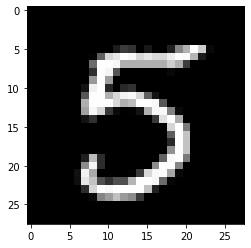

In [8]:
plt.imshow(X[0].reshape(28,28),cmap="gray")

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [10]:
model=KNeighborsClassifier()

In [11]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
model.score(X_test,y_test)

In [24]:
class costom:
    def __init__(self,neighbour=5):
        self.neighbour=neighbour
        
    def fit(self,x,y):
        self.x=(x-x.mean())/x.std()
        self.y=y
        
    def predicted_point(self,point):
        distances=[]
        for xd,yd in zip(self.x , self.y):
            distance=np.sum((xd-point)**2)
            distances.append([distance,yd])
        #print(distances)
        sort=sorted(distances)[:self.neighbour]
        ans,count=np.unique(np.array(sort)[:,1],return_counts=True)
        max_ind=np.argmax(count)
        return ans[max_ind]
    
    def predict(self,x):
        result=[]
        x=(x-x.mean())/x.std()
        for num in x:
            result.append(self.predicted_point(num))
        return result
    
    def score(self,X,y):
        yp=self.predict(X)
        return (yp==y).mean()

In [25]:
a=costom()

In [26]:
a.fit(X_train,y_train)

In [30]:
a.predicted_point(X[1])

0.0

In [42]:
a.score(X_test,y_test)

0.9542424242424242

In [28]:
a.predict(X_test[:10])

[1.0, 7.0, 0.0, 9.0, 4.0, 5.0, 4.0, 6.0, 9.0, 2.0]

In [29]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)